<a href="https://colab.research.google.com/github/AnnaPechenina/2016-08-23-unt-github-collaboration/blob/master/Intro_to_Python_Day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from SI618 in-class notebook 4 and 8

<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [ ]:
import pandas as pd

Seaborn (and other packages) come bundled with datasets.  Let's load the infamous Fisher's Iris Dataset:

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exercise 1:
Create a 2-d scatterplot of petal_width (on the y-axis) vs. petal_length (on the x-axis) that includes a regression line.

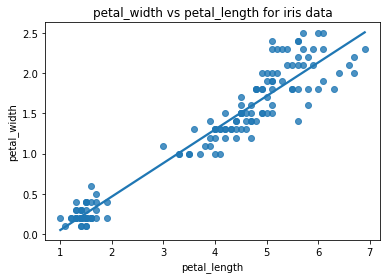

In [ ]:
# insert your code here
ax = sns.regplot(x = "petal_length",
            y = "petal_width", 
            ci = None,
            data = iris)
_ = ax.set_title("petal_width vs petal_length for iris data")

## Introduction to scikit-learn

Recall the general process for using a scikit-learn estimator:
1. choose appropriate class that implements what you want to do and import it
1. choose model hyperparameters (or accept default ones, but be careful) and instantiate class
1. arrange data into features and labels
1. .fit() your model to the data
1. apply model to new data with .predict() for supervised learning

Let's do that with the regression model we implemented using statsmodels above:



1. choose appropriate class that implements what you want to do and import it

This takes a bit of experience to figure out, but we'll cover the common ones over the next few classes.  For now, I'll tell you that we want to use sklearn.linear_model.LinearRegression.  Import only that class into your default namespace:

### Exercise 3: write the correct line to import LinearRegression from the sklearn.linear_model module:

In [ ]:
# insert your code here
from sklearn.linear_model import LinearRegression

### Exercise 4: choose model hyperparameters (or accept default ones, but be careful) and instantiate class
It's ok to accept the defaults this time. Let's assign the model to a variable called `lm`.

In [ ]:
# insert your code here
lm = LinearRegression()

### Exercise 5: arrange data into features and labels
Create one dataframe for the 'y' values (and call it 'y') and another dataframe for the 'x' values (and call it 'X').

In [ ]:
# insert your code here
y = iris[['petal_width']]
X = iris[["petal_length"]]
len(y)
len(X)

150

### Exercise 6: .fit() your model to the data

In [ ]:
# insert your code here
lm.fit(X, y)

LinearRegression()

### Exercise: apply model to new data with .predict() 
What's the estimated value for petal_width if the petal_length is 10?

In [ ]:
# insert your code here
import numpy as np
np.array(10)

array(10)

In [ ]:
np.array([10]).reshape(-1,1).ndim

2

In [ ]:
lm.predict(np.array([10]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[3.79447864]])

Great!  But what does our model actually look like?

We can always access a measure of how good our model is by calling .score(X,y):

In [ ]:
lm.score(X,y)

0.9271098389904927

In the case of LinearRegression, we can access the coefficients for the equation:

In [ ]:
lm.coef_

array([[0.41575542]])

and the value of the intercept:

In [ ]:
lm.intercept_

array([-0.36307552])

Which, if we've done everything right, should match the results we got from statsmodels!

## Cross-validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
result = cross_validate(lm, X, y, scoring='neg_mean_squared_error') # see docstring for more details

In [ ]:
result['test_score']

array([-0.0109505 , -0.01435888, -0.02917584, -0.06226445, -0.10967123])

In [ ]:
np.mean(result['test_score'])

-0.04528418063039469

In [ ]:
np.std(result['test_score'])

0.03695585666673522

In [ ]:
cross_validate(lm, X, y, scoring='r2') # see docstring for more details

{'fit_time': array([0.00549459, 0.00501704, 0.00306463, 0.0031271 , 0.00299406]),
 'score_time': array([0.00522757, 0.00256228, 0.00236177, 0.00237346, 0.00235653]),
 'test_score': array([-0.11487018,  0.95263007,  0.38011675,  0.68756687, -0.45925651])}

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Note: unlike most other scores, R^2 score may be negative (it need not actually be the square of a quantity R).

See also https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative


What other scorers are available?

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Part II - Machine Learning Pipelines for Regression


## Goal: to predict the flipper length of penguins given a number of features about them.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Task 1
Are there any missing values?  Deal with the missing values.

In [ ]:
# insert your code here
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
penguins = penguins.dropna()

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Task 2
Use .value_counts() to get a sense of the distribution of categorical variables.

In [ ]:
# insert your code here
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
penguins.island.value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [ ]:
penguins.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [ ]:
for col in penguins.select_dtypes(exclude = np.number).columns:
    print(penguins[col].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64
Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64
Male      168
Female    165
Name: sex, dtype: int64


### Task 3
Create scatterplots for all combinations of numeric variables (hint: sns.pairplot() might be useful)

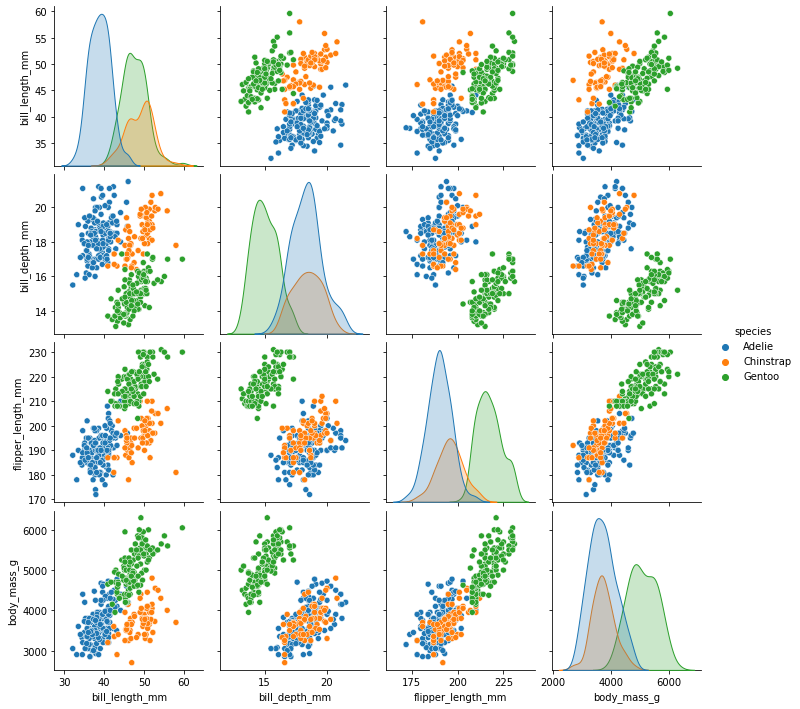

In [ ]:
# insert your code here
sns.pairplot(penguins, hue="species")

Think of crosstab between island and species maybe?

In [ ]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


### Task 4
Split the data into training and testing sets, ensuring that the same distribution of species exists in the split data sets as the distribution of species in the original dataframe.

In [ ]:
# insert your code here
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(penguins, penguins["species"]):
    strat_train_set = penguins.iloc[train_index]
    strat_test_set = penguins.iloc[test_index]

In [ ]:
strat_test_set.species.value_counts(normalize=True)

Adelie       0.432836
Gentoo       0.358209
Chinstrap    0.208955
Name: species, dtype: float64

In [ ]:
strat_train_set.species.value_counts(normalize=True)

Adelie       0.439850
Gentoo       0.357143
Chinstrap    0.203008
Name: species, dtype: float64

### Task 5
Create a design matrix (`penguins_X`) and a label matrix (`penguins_y`) from the stratified training set.

In [ ]:
# insert your code here
penguins_X = strat_train_set.drop('flipper_length_mm', axis=1)
penguins_Y = strat_train_set['flipper_length_mm']

### Task 6
Create a pipeline to apply a `StandardScaler()` to all numeric values and a `OneHotEncoder()` to the categorical variables in `penguins_X`. Assign the resulting matrix to a variable called `penguins_prepared`.

In [ ]:
# insert your code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = penguins_X.select_dtypes(include = np.number).columns
cat_attribs = penguins_X.select_dtypes(exclude = np.number).columns

In [ ]:
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [ ]:
penguins_prepared = full_pipeline.fit_transform(penguins_X)
penguins_prepared

array([[ 0.16732502, -1.99231135,  1.08239437, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.22705014,  1.25552054, -0.21564233, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.87989881, -0.52063753,  2.19499725, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.02115604,  1.25552054,  0.21703657, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.80681432, -0.46989015,  1.453262  , ...,  0.        ,
         0.        ,  1.        ],
       [-1.91558298,  0.90028893, -0.77194377, ...,  1.        ,
         1.        ,  0.        ]])

In [ ]:
full_pipeline.fit(penguins_X)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['bill_length_mm', 'bill_depth_mm', 'body_mass_g'], dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['species', 'island', 'sex'], dtype='object'))])

### Task 7
Fit a linear regression to penguins_prepared and penguins_y.

In [ ]:
# insert your code here
lm = LinearRegression()
lm.fit(penguins_prepared, penguins_Y)

LinearRegression()

### Task 8
Use the fitted model to show the predicted values for the first 5 rows of data.

In [ ]:
# insert your code here
first_five = penguins_X.iloc[:5]
first_five

,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex
268,Gentoo,Biscoe,44.9,13.3,5100.0,Female
205,Chinstrap,Dream,50.7,19.7,4050.0,Male
337,Gentoo,Biscoe,48.8,16.2,6000.0,Male
123,Adelie,Torgersen,41.4,18.5,3875.0,Male
38,Adelie,Dream,37.6,19.3,3300.0,Female


In [ ]:
first_five_prepared = full_pipeline.transform(first_five)
lm.predict(first_five_prepared)

array([215.01468587, 199.35012793, 224.24848666, 194.36658597,
       188.16116242])

### Task 9
Show the mean and standard deviation of the root mean squared error for your model.

In [ ]:
# Insert your code here
result = cross_validate(lm, penguins_prepared, penguins_Y, scoring='neg_mean_squared_error') # see docstring for more details

In [ ]:
np.mean(result["test_score"])

-29.15538922941268

In [ ]:
np.std(result["test_score"])

3.7178996821632513

In [ ]:
penguins.flipper_length_mm

0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
338    214.0
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 333, dtype: float64

### Task 10
Apply your model to the test data (from your train-test split) and report the final root mean squared error (RMSE).

In [ ]:
# Insert your code here
penguins_X_test = strat_test_set.drop('flipper_length_mm', axis=1)
penguins_Y_test = strat_test_set['flipper_length_mm']
penguins_X_test_prepared = full_pipeline.transform(penguins_X_test)

In [ ]:
final_predictions = lm.predict(penguins_X_test_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(penguins_Y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [ ]:
final_rmse

5.147149658862229

## Matplotlib, the basis for visualization in python

Matplotlib home page: https://matplotlib.org/index.html

Gallery: https://matplotlib.org/gallery/index.html

Sample plots: https://matplotlib.org/tutorials/introductory/sample_plots.html

https://matplotlib.org/users/pyplot_tutorial.html

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

## matplotlib.pyplot

* collection of functions that make matplotlib work like MATLAB (is that helpful???)
* each function makes some change to a figure:
  * create a figure
  * create a plotting area in a figure
  * plots some lines in a plotting area
  * decorates the plot with labels, etc.
* states are preserved across function calls

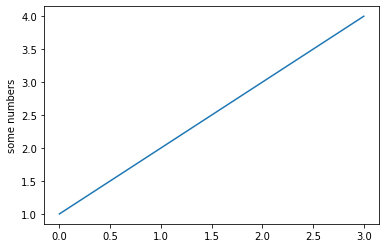

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

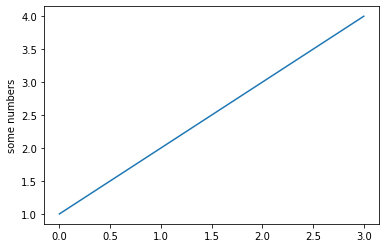

In [ ]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

### <font color="magenta">Q1: Where did the numbers on the x-axis come from?</font>

plt got them from y-axis index

To specify x- and y-values:

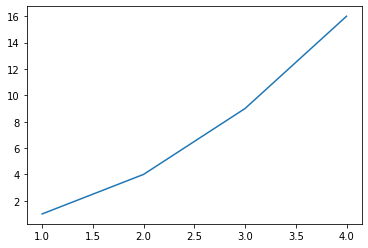

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

In [ ]:
%matplotlib inline

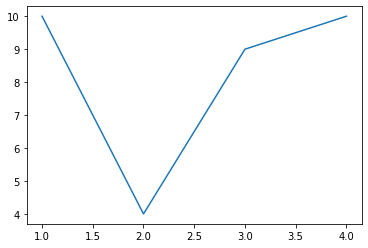

In [ ]:
plt.plot([1, 2, 3, 4], [10, 4, 9, 10])
# plt.axis([0, 6, 1, 20])
plt.show()

Note default shape is "b-", which means a blue line

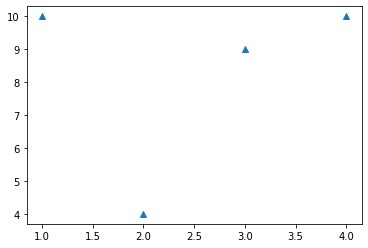

In [ ]:
plt.plot([1, 2, 3, 4], [10, 4, 9, 10], '^')
# plt.axis([0, 6, 0, 20])
plt.show()

We can explicitly set the bounds for the axes:

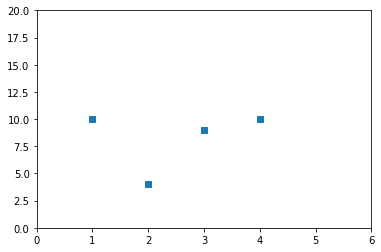

In [ ]:
plt.plot([1, 2, 3, 4], [10, 4, 9, 10], 's')
plt.axis([0, 6, 0, 20])
plt.show()

Let's generate some data to play with:

In [ ]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5.1, 0.2)
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ])

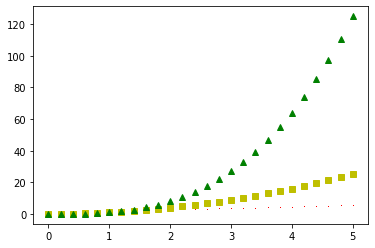

In [ ]:
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r,', t, t**2, 'ys', t, t**3, 'g^')
plt.show()

In [ ]:

markers = {'.': 'point', ',': 'pixel', 'o': 'circle', 
    'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', 
    '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 
    's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus',
    'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 
    'P': 'plus_filled', 'X': 'x_filled', 0: 
    'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 
    4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 
    8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 
    'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}


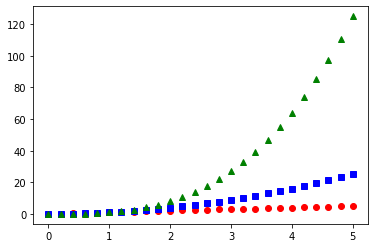

In [ ]:
plt.plot(t, t, 'ro', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

https://matplotlib.org/3.0.3/api/markers_api.html#module-matplotlib.markers

https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

### <font color="magenta">Q2: Try some other marker styles</font>

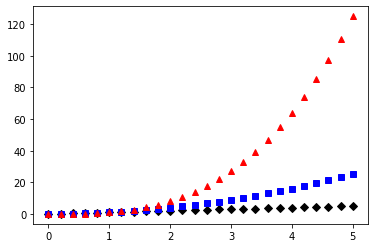

In [ ]:
plt.plot(t, t, 'kD', t, t**2, 'bs', t, t**3, 'r^')
plt.show()

## Setting line properties

In [ ]:
x, y = [1, 2, 3, 4], [1, 4, 9, 16]

In [ ]:
x

[1, 2, 3, 4]

In [ ]:
y

[1, 4, 9, 16]

Keyword args:

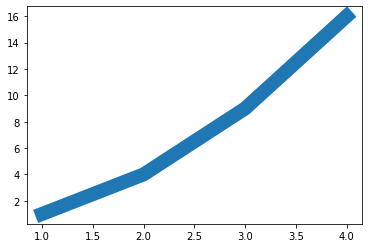

In [ ]:
plt.plot(x, y, linewidth=14.0)

setter methods:

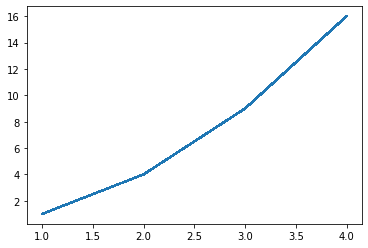

In [ ]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False)

```setp()```

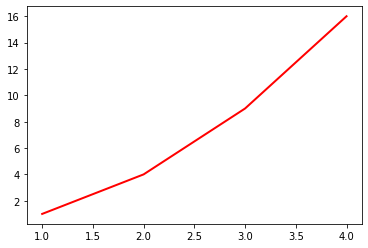

In [ ]:
line = plt.plot(x,y)
# use keyword args
plt.setp(line, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(line, 'color', 'r', 'linewidth', 2.0)
plt.show()

## Multiple plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 5.1, 0.1)
t2 = np.arange(0.0, 5.02, 0.02)

In [ ]:
t1

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [ ]:
t2

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18,
       2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 ,
       2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62,
       2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84,
       2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.

In [ ]:
f(t1)

array([ 1.        ,  0.73202885,  0.25300172, -0.22892542, -0.54230031,
       -0.60653066, -0.44399794, -0.1534533 ,  0.13885029,  0.32892176,
        0.36787944,  0.26929836,  0.09307413, -0.08421696, -0.19950113,
       -0.22313016, -0.16333771, -0.05645231,  0.05108017,  0.12100355,
        0.13533528,  0.09906933,  0.03424006, -0.03098169, -0.07339237,
       -0.082085  , -0.06008859, -0.02076765,  0.01879134,  0.04451472,
        0.04978707,  0.03644557,  0.01259621, -0.01139753, -0.02699954,
       -0.03019738, -0.02210536, -0.00763999,  0.00691295,  0.01637605,
        0.01831564,  0.01340758,  0.00463389, -0.00419292, -0.00993258,
       -0.011109  , -0.00813211, -0.0028106 ,  0.00254313,  0.00602441,
        0.00673795])

In [ ]:
plt.figure(1)
plt.subplot(221)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.show()

plt.subplot(222)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

NameError: ignored

In [ ]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

Just a figure and one subplot:

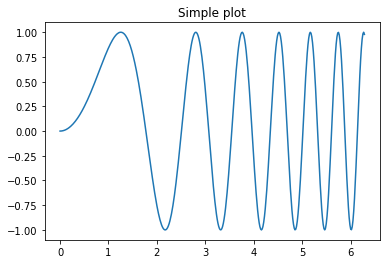

In [ ]:
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

Two subplots, the axes array is 1-d

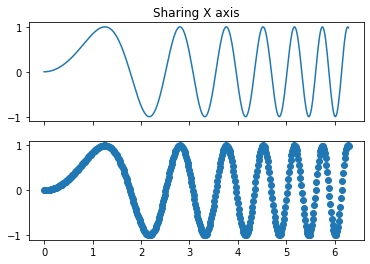

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)
plt.show()

Two subplots, unpack the axes array immediately


Text(0.5, 1.0, 'This is something else')

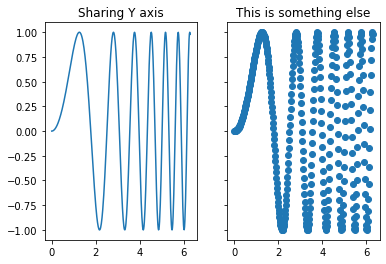

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
ax2.set_title('This is something else')

Three subplots sharing both x/y axes

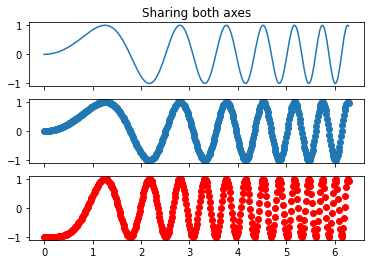

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
plt.show()

Fine-tune figure; make subplots close to each other and hide x ticks for all but bottom plot.

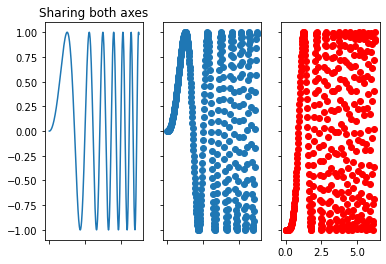

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

Row and column sharing:

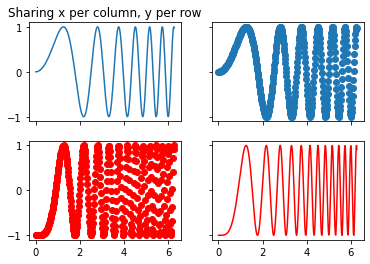

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

## Adding Text

In [ ]:
# Fixing random state for reproducibility
np.random.seed(618)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

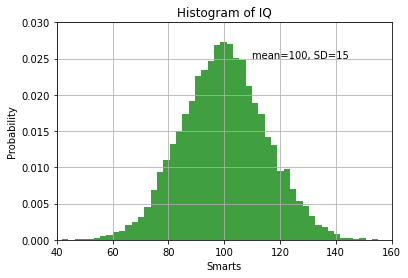

In [ ]:
# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(np.mean(x)+10, .025, 'mean=100, SD=15')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

See also [text properties and layout](https://matplotlib.org/users/text_props.html#text-properties).

## Annotating Text

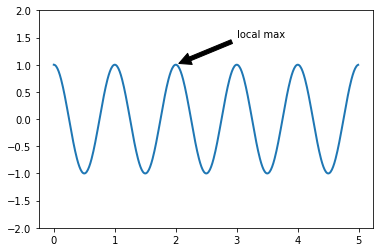

In [ ]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),)

plt.ylim(-2, 2)
plt.show()

### <font color="magenta">Q3: Using the McDonald's menu dataset, plot any 2 continuous variables as a scatterplot and annotate an interesting feature (e.g. local max, outlier, etc.).</font>

In [ ]:
import pandas as pd

In [ ]:
menu = pd.read_csv('https://github.com/umsi-data-science/data/raw/main/menu.csv')

In [ ]:
menu.head(15)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15


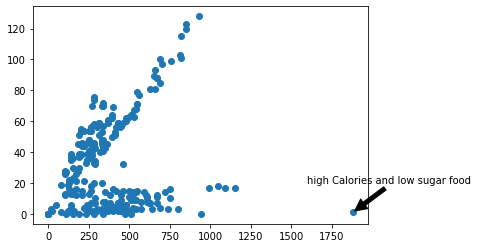

In [ ]:
plt.scatter(menu["Calories"],menu["Sugars"])
plt.annotate('high Calories and low sugar food', xy=(1880, 1), xytext=(1600, 20),
             arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

In [ ]:
menu[menu['Calories'] > 1750]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,118,39,6,24,1,87,0,15,8,25


## Using specific types of plots via pyplot

In addition to scatterplots, pyplot offers a number of other plot types.  These can be accessed via convenience functions such as ```scatter()```, ```hist()```, ```bar()```, ```barh()```, and ```pie()```, amongst others:

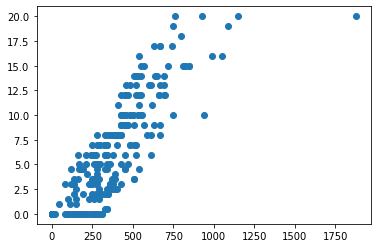

In [ ]:
plt.scatter(menu["Calories"],menu["Saturated Fat"])
plt.show()

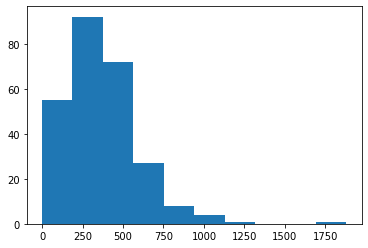

In [ ]:
plt.hist(menu['Calories'])
plt.show()

### <font color="magenta">Q4: Create a histogram of any one of the continuous variables from the McDonalds menu dataset.

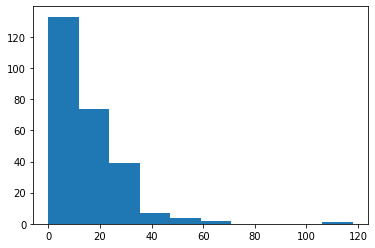

In [ ]:
# insert your code here
plt.hist(menu['Total Fat'])
plt.show()

Text(0.5, 1.0, 'Calories Distribution')

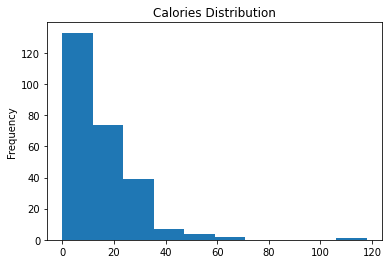

In [ ]:
f = menu['Total Fat'].plot(kind='hist')
f.set_title('Calories Distribution')

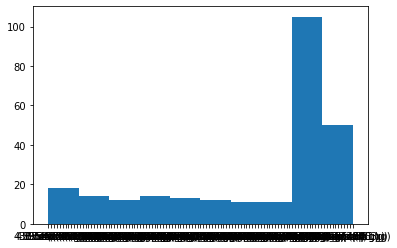

In [ ]:
plt.hist(menu['Serving Size'], bins = 10)
plt.show()

## Pandas and matplotlib integration

Cumbersome?  Yes.  A better way?  Use the matplotlib integration from pandas:

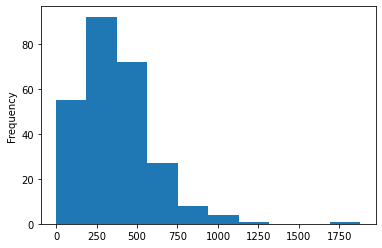

In [ ]:
menu['Calories'].plot(kind='hist')

Text(0.5, 1.0, 'Calories distribution')

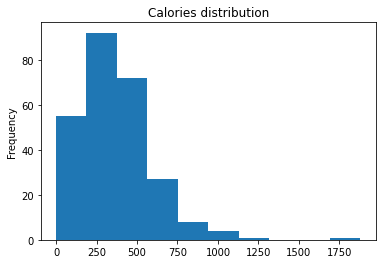

In [ ]:
f = menu['Calories'].plot(kind='hist')
f.set_title('Calories distribution')

Here are the valid values for "kind":

kind :
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot

## Bar plots with groupby()

In [ ]:
categories = menu.groupby('Category').size()

In [ ]:
categories

Category
Beef & Pork           15
Beverages             27
Breakfast             42
Chicken & Fish        27
Coffee & Tea          95
Desserts               7
Salads                 6
Smoothies & Shakes    28
Snacks & Sides        13
dtype: int64

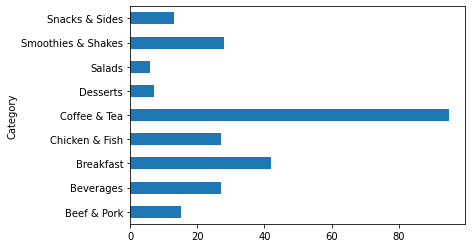

In [ ]:
categories.plot(kind='barh')

In [ ]:
categories_sorted = categories.sort_values(ascending=True)

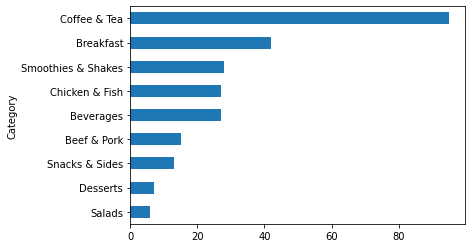

In [ ]:
categories_sorted.plot(kind='barh')

### <font color="magenta">Q5: Create a new column in the menu DataFrame called "Sugary" whose value is 1 if the values of "Sugars" is greater than 20, otherwise set it to 0. 

    Hint: use np.where(...) (look it up in the documentation)

In [ ]:
menu.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


In [ ]:
# insert your code here
menu["Sugary"] = np.where(menu["Sugars"]>20, 1, 0)

## Create a stacked bar plot by using a 2-level groupby() followed by an unstack():

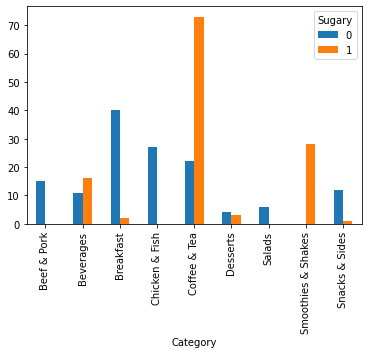

In [ ]:
menu.groupby(["Category","Sugary"]).size().unstack().plot(kind = "bar")

In [ ]:
menu.groupby(["Category","Sugary"]).size().unstack()

Sugary,0,1
Category,,
Beef & Pork,15.0,NaN
Beverages,11.0,16.0
Breakfast,40.0,2.0
Chicken & Fish,27.0,NaN
Coffee & Tea,22.0,73.0
Desserts,4.0,3.0
Salads,6.0,NaN
Smoothies & Shakes,NaN,28.0
Snacks & Sides,12.0,1.0


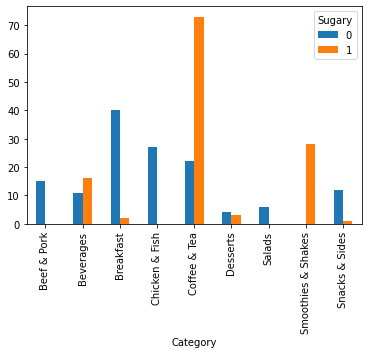

In [ ]:
menu.groupby(["Category","Sugary"]).size().unstack().plot(kind = "bar")

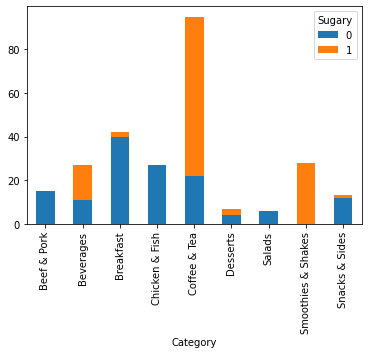

In [ ]:
menu.groupby(["Category", "Sugary"]).size().unstack().plot(kind = "bar", stacked = True)

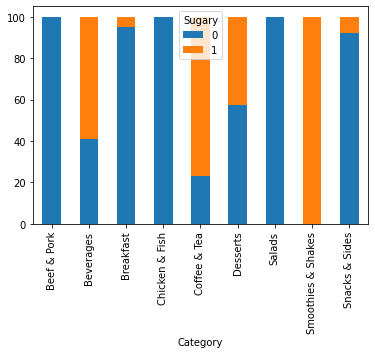

In [ ]:
menu.groupby(['Category', 'Sugary']).size().groupby(by='Category').apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', stacked=True)

### <font color="magenta">Q6: Repeat the above steps to generate three bar plots for any other continuous variable that you split into "high" and "low" values, just as with did with "Sugars" above.

In [ ]:
# insert your code here
menu["Fat_or_not"] = np.where(menu["Total Fat"]>20, 1, 0)

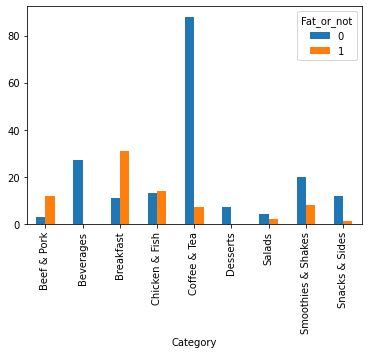

In [ ]:
menu.groupby(["Category","Fat_or_not"]).size().unstack().plot(kind = "bar")

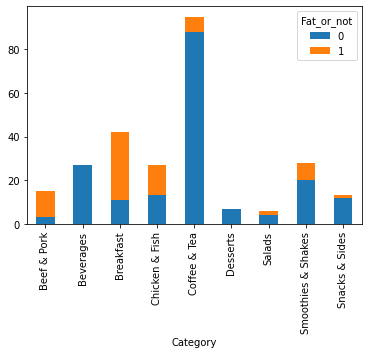

In [ ]:
menu.groupby(["Category", "Fat_or_not"]).size().unstack().plot(kind = "bar", stacked = True)

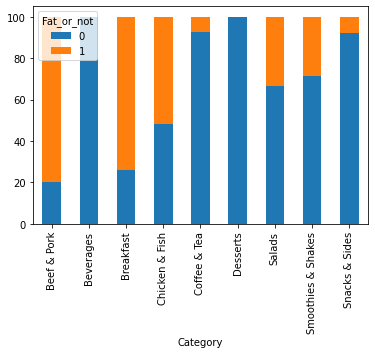

In [ ]:
menu.groupby(['Category', 'Fat_or_not']).size().groupby(by='Category').apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar', stacked=True)

### Pie Charts

There are many issues with pie charts, and the one below is a good example of what not to do, but everyone wants to know how to make them:

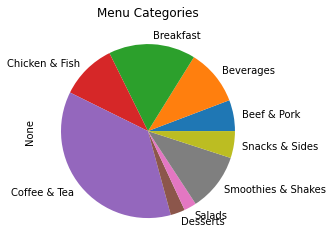

In [ ]:
# don't do this...
categories.plot(kind='pie', title='Menu Categories')

## Subplots (again)

In addition to the way we used subplots in the previous class, we can use the ```.subplots()``` function to generate mulitple plots within a figure.  ```subplots()``` returns a set of axes on which we can make plots.

To demonstrate how this works, let's fill in just one of the subplots:


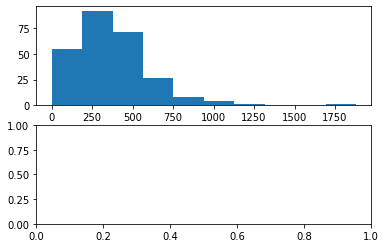

In [ ]:
f, (ax1, ax2) = plt.subplots(2) # if only 1 argument, we assume it's the number of rows
ax1.hist(menu['Calories'])
plt.show()

Now let's fill in both subplots:

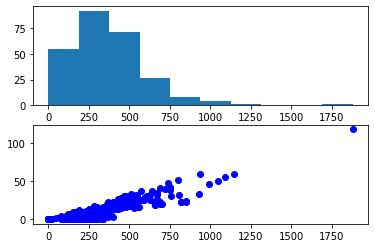

In [ ]:
f, (ax1, ax2) = plt.subplots(2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

Now let's make a 2x2 layout of 4 plots.  Note the structure of the return values from the subplots function:

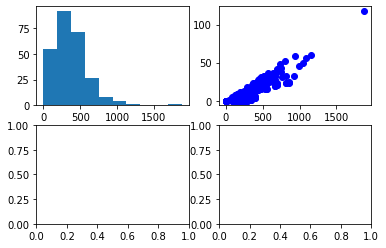

In [ ]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Calories'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

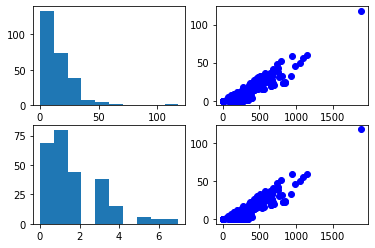

In [ ]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Total Fat'])
ax2.plot(menu['Calories'],menu['Total Fat'],'bo')
ax3.hist(menu['Dietary Fiber'])
ax4.plot(menu['Calories'],menu['Total Fat'],'bo')
plt.show()

Alternatively, we can use the pandas-matplotlib integration.  Note the use of the ```ax=``` keyword arg.

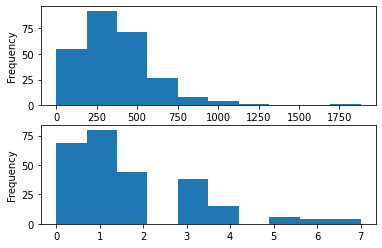

In [ ]:
f, (ax1, ax2) = plt.subplots(2)
menu['Calories'].plot(ax=ax1, kind='hist')
menu['Dietary Fiber'].plot(ax = ax2,kind='hist')
plt.show()

### <font color="magenta">Q7: Use subplots() to create a figure consisting of 4 plots.

They could be scatter plots, histograms, bar charts, pie plots, or any of the kinds (repeated here for your convenience):
    
    kind :
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot

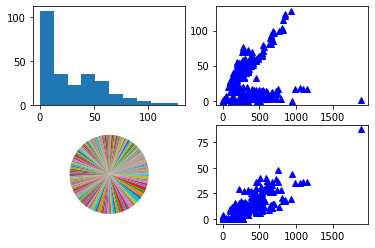

In [ ]:
# insert your code here
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.hist(menu['Sugars'])
ax2.plot(menu['Calories'],menu['Sugars'],'b^')
ax3.pie(menu['Sugars'])
ax4.plot(menu['Calories'],menu['Protein'],'b^')
plt.show()

### [xkcd](https://xkcd.com/1838/) style plots (just for fun)

Note that we can scope the use of any ```plt.``` function by using a ```with``` statement.

Note also that we can save a figure as a file by using ```savefig(...)``` (as shown below).

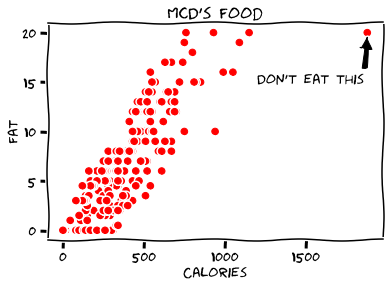

In [ ]:
with plt.xkcd():
        # This figure will be in XKCD-style
        plt.plot(menu["Calories"],menu["Saturated Fat"],'ro')
        plt.title("McD's Food")
        plt.xlabel('Calories')
        plt.ylabel('Fat')
        plt.annotate("Don't eat this",xytext=(1200,15),xy=(1880,20),arrowprops=dict(facecolor='black', shrink=0.1))
        plt.savefig('xkcd.png',format='png') # alternatively, we could save as a pdf, svg, ps, or eps
        plt.show()

## Visualizing data with Seaborn
* Visualization package built on top of matplotlib
* It's meant to make your life better
* Plays well with pandas, numpy, scipy, and statsmodels
* Many different visualization are included:
 * Strip plots, Swarm plots, Violin plots
 * Box plots
 * Histograms
 
 We need to import the package, and it's typically imported as sns:
 
 ```
 import seaborn as sns
 ``` 
 
 and don't forget to inline matplotlib (that's a jupyter thing):

 ```
 %matplotlib inline
 ```

[seaborn.pydata.org](http://seaborn.pydata.org)

## Seaborn versus Matplotlib
* Matplotlib
     * Low-level, basis for many packages
     * Painful to construct certain graphs
     * Not Pandas friendly
     * Not interactive
* Seaborn
     * Pandas friendlier
     * Great for some stats plots


In [ ]:
import seaborn as sns

## Strip Plot

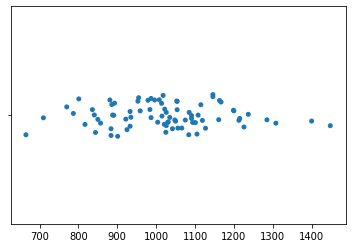

In [ ]:
%matplotlib inline
import seaborn as sns  # you might need to do: conda install seaborn
sns.stripplot(x=measures)

## Swarm Plot

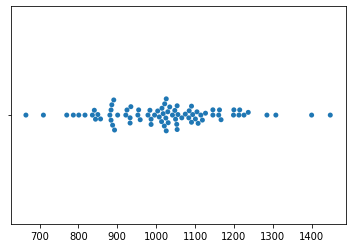

In [ ]:
sns.swarmplot(x=measures)

## Violin Plot
* If we have too much data

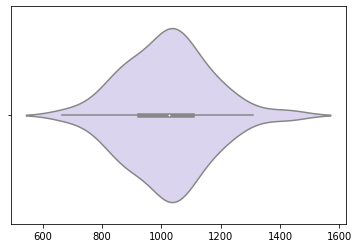

In [ ]:
sns.violinplot(x=measures,color="#d7d0f3")

## Box Plot

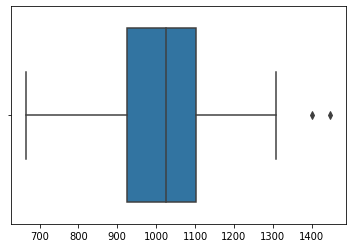

In [ ]:
sns.boxplot(x=measures) 

And we can manipulate the underlying plot to control different features.  See 
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python#34162641
and
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots for explanations about ```plt.subplots()```



(array([ 600.,  700.,  800.,  900., 1000., 1100., 1200., 1300., 1400.,
        1500.]), <a list of 10 Text major ticklabel objects>)

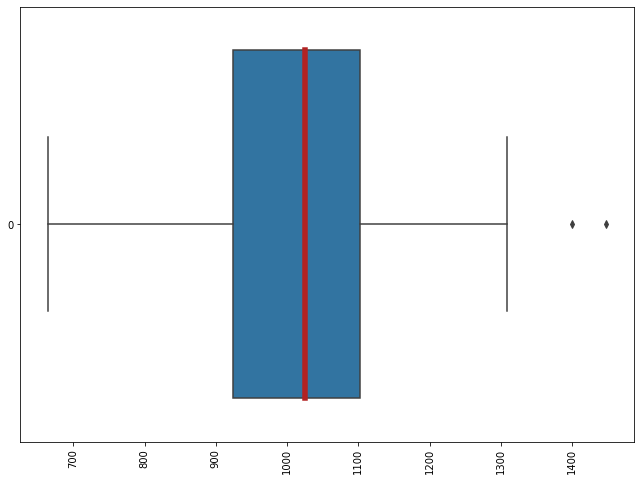

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
medianprops = dict( linewidth=5.5, color='firebrick')
sns.boxplot(medianprops=medianprops,data=measures,orient='h')
plt.xticks(rotation=90)


## Histogram

We're going to use this a lot.  Seaborn puts a nice smooth line over a distribution.  We'll talk about that soon, but for now just think about it as an extrapolation:  if we had a bunch more data, the distribution would eventually smooth out to something that looks like the line.

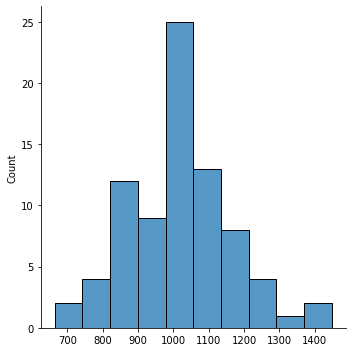

In [ ]:
# x axis = value, y axis = count (frequency)
sns.displot(measures, kde=False); 

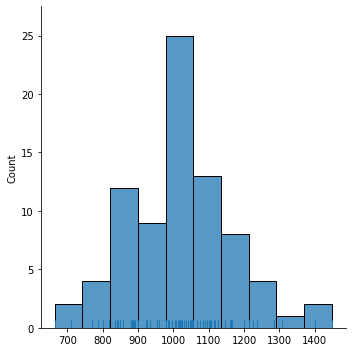

In [ ]:
sns.displot(measures, rug=True); # show a strip plot on bottom -- we call it a "rug"

### <font color="magenta">Q12: Test driving Seaborn</font>
Your turn:  create the above plots (strip, swarm, violin, box, and histogram for your "things".

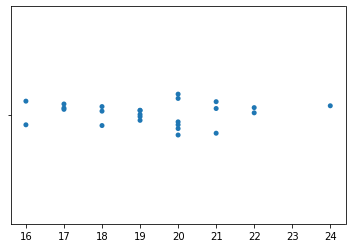

In [ ]:
sns.stripplot(x=things)

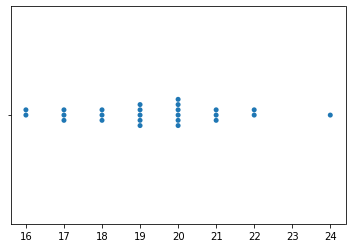

In [ ]:
sns.swarmplot(x=things)

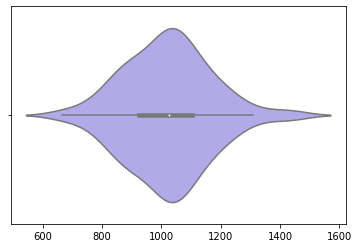

In [ ]:
sns.violinplot(x=measures,color="#a7a0f3")

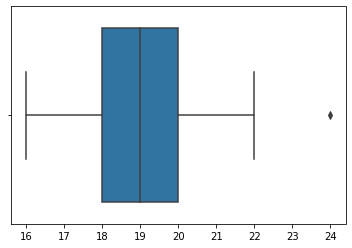

In [ ]:
sns.boxplot(x=things)

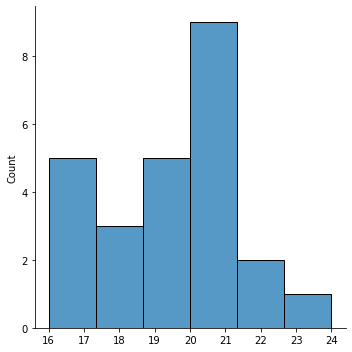

In [ ]:
# insert your code here
sns.displot(things, kde=False); 

Chose two plots from the ones you generated above and in your own words explain what each of them tells you about your data.

for box plot, it is seen that the data we generate has a very even for it is not bias. But if we see from the histogram we can still see they are still not symmetrical.

## Visualizing the menu data using Seaborn

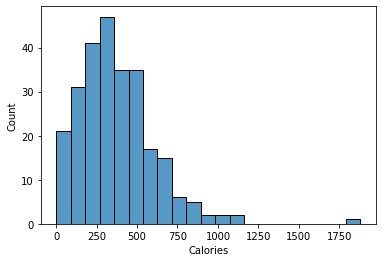

In [ ]:
sns.histplot(menu.Calories)

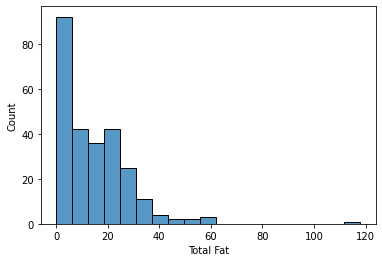

In [ ]:
sns.histplot(menu['Total Fat'])

In [ ]:
print(sns.__version__)

0.11.2


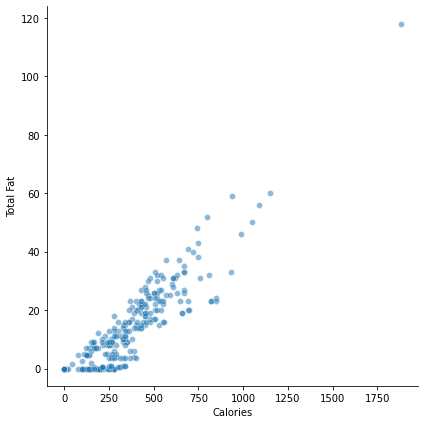

In [ ]:
# Relationship between petal_width & petal_length by species
sns.relplot(x="Calories", y="Total Fat",# hue="Category",
            sizes=(40, 400), alpha=.5, 
            height=6, data=menu)

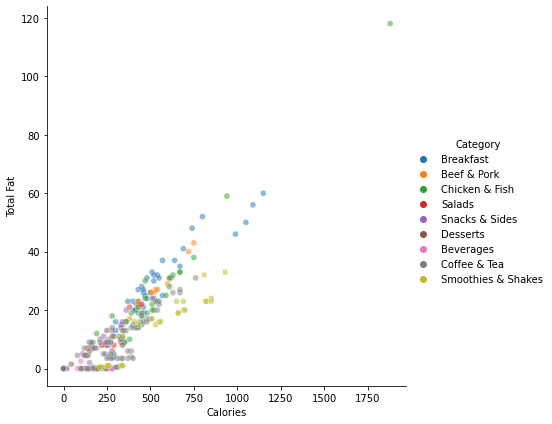

In [ ]:
# Relationship between petal_width & petal_length by species
sns.relplot(x="Calories", y="Total Fat",hue="Category",
            sizes=(40, 400), alpha=.5, 
            height=6, data=menu)

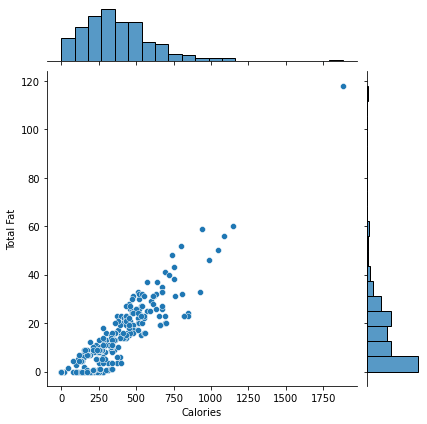

In [ ]:
sns.jointplot(x='Calories',y='Total Fat',data=menu)

It's a bit difficult to see where the interesting areas in the plot are, so it's worth trying a hexbin plot.  Go ahead and copy the above  code block and add ```kind="hex"``` to the jointplot parameters. 

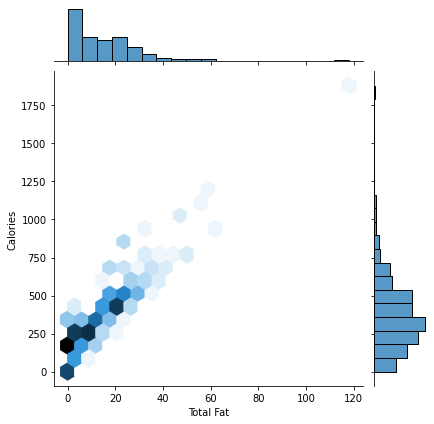

In [ ]:
# insert your code here
sns.jointplot(x='Total Fat',y='Calories',kind="hex",data=menu)

Now, take a look at what happens when you set ```kind="kde"```

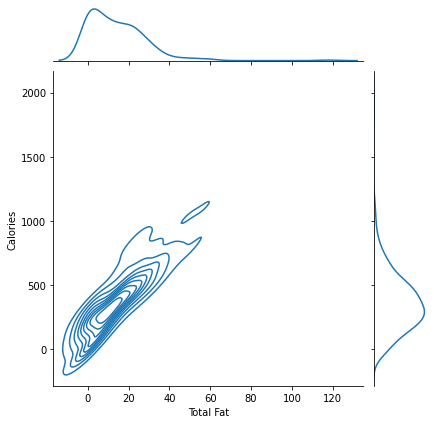

In [ ]:
sns.jointplot(x='Total Fat',y='Calories',kind="kde",data=menu)

Finally, you may want to look at all the numeric variables in your
dataset. Use ```pairplot``` to do this:


In [ ]:
menu[menu['Category'] == 'Breakfast']

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Sugary,Fat_or_not
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,0,0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,0,0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,4,17,2,14,8,0,25,10,0,1
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,4,17,2,21,15,0,30,15,0,1
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,4,17,2,21,6,0,25,10,0,1
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,4,18,3,26,15,2,30,20,0,1
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,2,7,3,19,10,8,15,15,0,1
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,3,12,4,19,15,8,20,20,0,1
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,2,7,3,20,2,8,15,10,0,0
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,3,12,4,20,6,8,15,15,0,1


In [ ]:
menu.query("Category == 'Breakfast'")

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Sugary,Fat_or_not
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,0,0
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,0,0
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,4,17,2,14,8,0,25,10,0,1
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,4,17,2,21,15,0,30,15,0,1
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,4,17,2,21,6,0,25,10,0,1
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,4,18,3,26,15,2,30,20,0,1
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,2,7,3,19,10,8,15,15,0,1
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,3,12,4,19,15,8,20,20,0,1
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,2,7,3,20,2,8,15,10,0,0
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,3,12,4,20,6,8,15,15,0,1


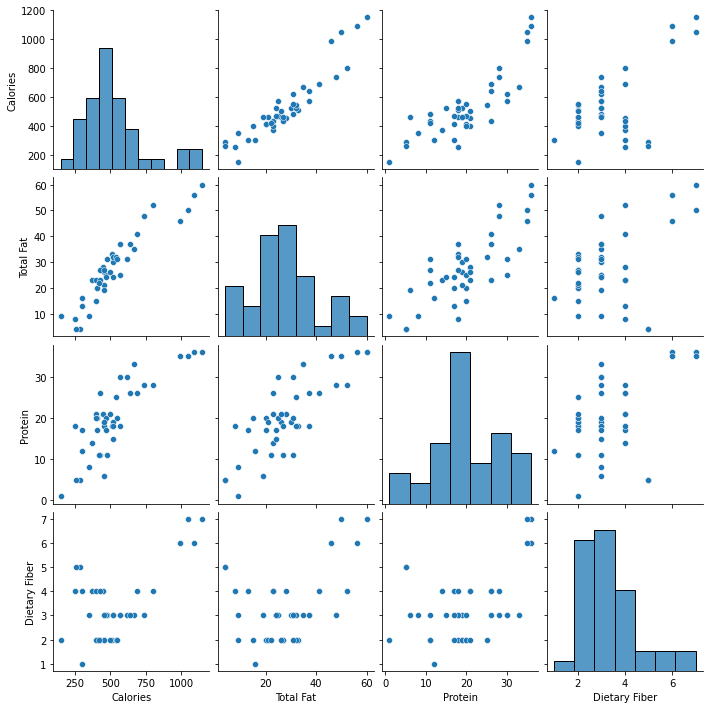

In [ ]:
sns.pairplot(menu.query("Category == 'Breakfast'"),vars=['Calories','Total Fat','Protein','Dietary Fiber'])

We can get fancier by using a different column to set the color (or "hue"):

Try running the following code:

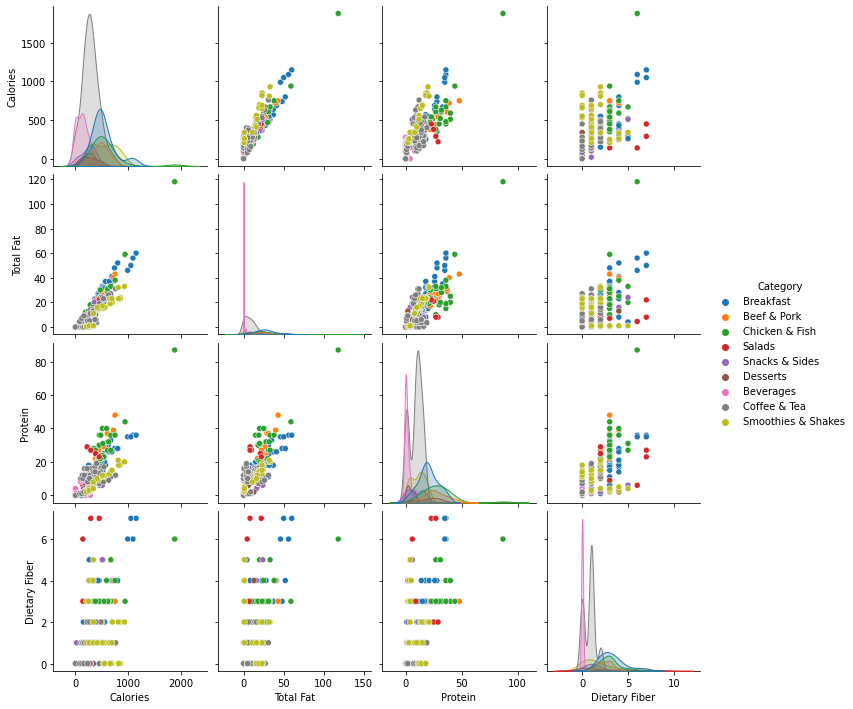

In [ ]:
sns.pairplot(menu,hue="Category",vars=['Calories','Total Fat','Protein','Dietary Fiber'])

Now let's introduce some correlations.  We're not going to spend time on learning about the 
theory behind correlation, as you've done that in the statistics prerequisite for this course.
Instead, we're going to jump right in and annotate a graph with a lot of statistical information:

In [ ]:
from scipy import stats

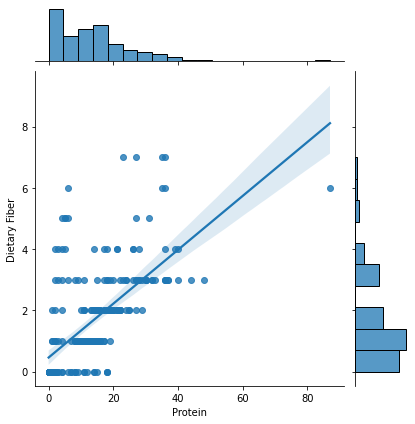

In [ ]:
# ignore the warning about deprecated annotation
g = sns.JointGrid(data=menu,x='Protein',y='Dietary Fiber')
g = g.plot(sns.regplot, sns.histplot)